In [15]:
library(dplyr)
library(ggplot2)

In [1]:
bulk_filename = '/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/expression_associations.f_cells.tsv'

In [17]:
sc_filename = '/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/iPSC_scanpy/Cuomo2020.cluster_expression_markers.cluster2.tsv'

In [2]:
df_bulk = read.csv(bulk_filename,sep="\t")
nrow(df_bulk)
head(df_bulk)

[1] 13475

ensembl_gene_id,hgnc_symbol,coef,pval,pval_adj
ENSG00000197461,PDGFA,-0.5542108,1.376734e-14,1.855149e-10
ENSG00000152977,ZIC1,-0.5391174,9.515179e-14,6.410852e-10
ENSG00000164651,SP8,-0.5286450,3.441941e-13,1.546005e-09
ENSG00000171794,UTF1,-0.4988503,1.058444e-11,3.412170e-08
ENSG00000152779,SLC16A12,-0.4972099,1.266111e-11,3.412170e-08
ENSG00000048540,LMO3,-0.4912546,2.407010e-11,5.405742e-08


In [19]:
# nrow(df_bulk)
df = df_bulk[df_bulk$pval_adj < 0.05,]
nrow(df)
supp_tables_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/neuroseq_ms/supp_tables/"
filename = paste0(supp_tables_dir,"SuppTable4_genes_associated_w_differentiation_efficiency_fdr0.05.csv")
write.csv(df,filename, quote = F, row.names = F)

[1] 2045

In [20]:
df_bulk = df_bulk[order(df_bulk$pval_adj),]
df = data.frame(genes = df_bulk$ensembl_gene_id[1:1000])
head(df)
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/diff_efficiency/top1000genes_associated_with_diff_efficiency.tsv"
write.table(df, filename, quote = F, sep = "\t", row.names = F, col.names = T)

genes
ENSG00000197461
ENSG00000152977
ENSG00000164651
ENSG00000171794
ENSG00000152779
ENSG00000048540


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


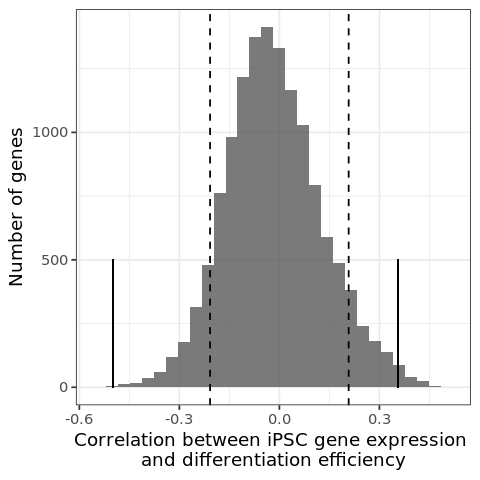

In [21]:
options(repr.plot.width=4, repr.plot.height=4)
l = max(df_bulk[df_bulk$pval_adj < 0.05 & df_bulk$coef<0,"coef"])
r = min(df_bulk[df_bulk$pval_adj < 0.05 & df_bulk$coef>0,"coef"])
TAC3 = df_bulk[df_bulk$hgnc_symbol == 'TAC3',"coef"]
UTF1 = df_bulk[df_bulk$hgnc_symbol == 'UTF1',"coef"]
p = ggplot(df_bulk, aes(x=coef)) + geom_histogram(alpha = 0.8) + 
    #coord_cartesian(ylim = c(0, 2000), xlim(c(-0.6,0.6)) +
    #ylim(c(0,2000)) +#xlim(c(-0.6,0.6)) +
    xlab("Correlation between iPSC gene expression \nand differentiation efficiency") + ylab("Number of genes") +
    geom_vline(xintercept = l, linetype="dashed") + 
#     annotate("text", label = "FDR = 5%", x = l-0.04, y = 1000, angle = 90) +
    geom_vline(xintercept = r, linetype="dashed") +
    geom_segment(aes(x = TAC3, y = 0, xend = TAC3, yend = 500),size = 0.2) +
#     annotate("text", label = "TAC3", x = TAC3, y = 580) +
    geom_segment(aes(x = UTF1, y = 0, xend = UTF1, yend = 500),size = 0.5) +
#     annotate("text", label = "UTF1", x = UTF1, y = 580) +
    theme_bw() 
p 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


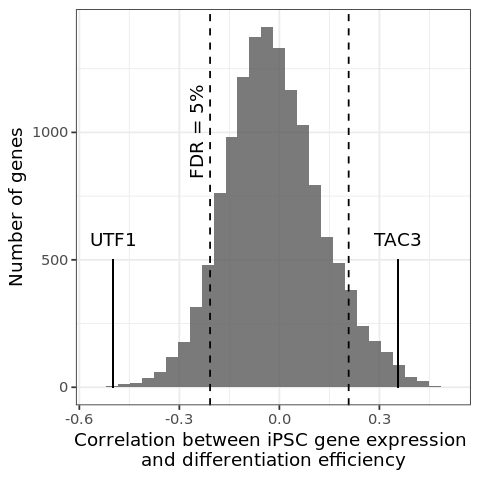

In [22]:
options(repr.plot.width=4, repr.plot.height=4)
l = max(df_bulk[df_bulk$pval_adj < 0.05 & df_bulk$coef<0,"coef"])
r = min(df_bulk[df_bulk$pval_adj < 0.05 & df_bulk$coef>0,"coef"])
TAC3 = df_bulk[df_bulk$hgnc_symbol == 'TAC3',"coef"]
UTF1 = df_bulk[df_bulk$hgnc_symbol == 'UTF1',"coef"]
p = ggplot(df_bulk, aes(x=coef)) + geom_histogram(alpha = 0.8) + #ylim(c(0,2000)) +#xlim(c(-0.6,0.6)) +
    xlab("Correlation between iPSC gene expression \nand differentiation efficiency") + ylab("Number of genes") +
    geom_vline(xintercept = l, linetype="dashed") + 
    annotate("text", label = "FDR = 5%", x = l-0.04, y = 1000, angle = 90) +
    geom_vline(xintercept = r, linetype="dashed") +
    geom_segment(aes(x = TAC3, y = 0, xend = TAC3, yend = 500),size = 0.2) +
    annotate("text", label = "TAC3", x = TAC3, y = 580) +
    geom_segment(aes(x = UTF1, y = 0, xend = UTF1, yend = 500),size = 0.5) +
    annotate("text", label = "UTF1", x = UTF1, y = 580) +
    theme_bw() 
p 

In [23]:
df_sc = read.csv(sc_filename,sep="\t")
head(df_sc)

names,pvals,pvals_adj,logfoldchanges,scores,cluster_id,ensembl_gene_id,hgnc_symbol
ENSG00000152977_ZIC1,0.000000e+00,0.000000e+00,5.223554,44.32686,2,ENSG00000152977,ZIC1
ENSG00000171794_UTF1,4.888347e-309,1.372526e-305,5.161236,42.95228,2,ENSG00000171794,UTF1
ENSG00000168505_GBX2,8.179711e-318,4.593317e-314,4.338133,42.70763,2,ENSG00000168505,GBX2
ENSG00000087510_TFAP2C,9.543329e-315,3.572704e-311,3.619993,42.21874,2,ENSG00000087510,TFAP2C
ENSG00000198417_MT1F,7.004946e-293,1.573451e-289,4.939952,40.33395,2,ENSG00000198417,MT1F
ENSG00000164093_PITX2,5.487019e-248,7.379923e-245,5.067068,37.91035,2,ENSG00000164093,PITX2


In [24]:
# library(dplyr)
df = inner_join(df_bulk,df_sc,by = c("ensembl_gene_id","hgnc_symbol"))
head(df)

Warning message:
“Column `ensembl_gene_id` joining factors with different levels, coercing to character vector”Warning message:
“Column `hgnc_symbol` joining factors with different levels, coercing to character vector”

ensembl_gene_id,hgnc_symbol,coef,pval,pval_adj,names,pvals,pvals_adj,logfoldchanges,scores,cluster_id
ENSG00000197461,PDGFA,-0.5542108,1.376734e-14,1.855149e-10,ENSG00000197461_PDGFA,6.827479e-188,2.949208e-185,2.150494,31.27374,2
ENSG00000152977,ZIC1,-0.5391174,9.515179e-14,6.410852e-10,ENSG00000152977_ZIC1,0.000000e+00,0.000000e+00,5.223554,44.32686,2
ENSG00000164651,SP8,-0.5286450,3.441941e-13,1.546005e-09,ENSG00000164651_SP8,1.646825e-172,4.742434e-170,3.940560,30.31831,2
ENSG00000171794,UTF1,-0.4988503,1.058444e-11,3.412170e-08,ENSG00000171794_UTF1,4.888347e-309,1.372526e-305,5.161236,42.95228,2
ENSG00000048540,LMO3,-0.4912546,2.407010e-11,5.405742e-08,ENSG00000048540_LMO3,3.521415e-77,2.272932e-75,1.771248,19.06132,2
ENSG00000136504,KAT7,-0.4892936,2.966062e-11,5.709669e-08,ENSG00000136504_KAT7,1.528012e-61,7.033240e-60,0.984112,16.89824,2


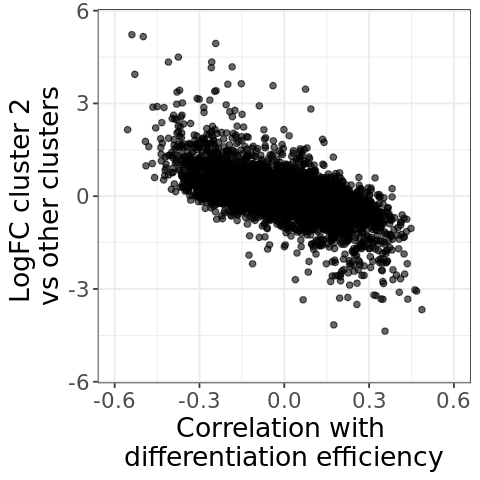

In [25]:
# library(ggplot2)
options(repr.plot.width=4, repr.plot.height=4)
ggplot(df, aes(x = coef, y = logfoldchanges)) + geom_point(size = 1.5, alpha = 0.6) + 
    xlim(c(-0.6,0.6)) + ylim(c(-5.5,5.5)) + 
   xlab("Correlation with \ndifferentiation efficiency") +  
    ylab("LogFC cluster 2 \nvs other clusters") + 
#     stat_smooth(method = "lm", col = "royalblue") + 
     theme_bw() + theme(text = element_text(size=16))

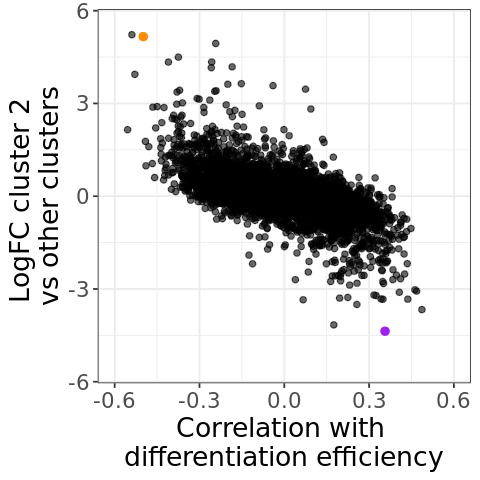

In [28]:
# library(ggplot2)
options(repr.plot.width=4, repr.plot.height=4)
ggplot(df, aes(x = coef, y = logfoldchanges)) + geom_point(size = 1.5, alpha = 0.6) + 
    xlim(c(-0.6,0.6)) + ylim(c(-5.5,5.5)) + 
   xlab("Correlation with \ndifferentiation efficiency") +  
    ylab("LogFC cluster 2 \nvs other clusters") + 
    geom_point(data = df[df$hgnc_symbol == 'UTF1',], size = 2, col = 'darkorange') + 
    geom_point(data = df[df$hgnc_symbol == 'TAC3',], size = 2, col = 'purple') + 
     theme_bw() + theme(text = element_text(size=16))